In [1]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = r'C:\Users\Nitish Borade\ffmpeg-master-latest-win64-gpl\bin\ffmpeg.exe'

In [2]:
from phi.flow import *

In [3]:
smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))  # sampled at cell centers
velocity = StaggeredGrid(0, extrapolation.ZERO, x=32, y=40, bounds=Box(x=32, y=40))  # sampled in staggered form at face centers

In [4]:
INFLOW_LOCATION = tensor([(4, 5), (8, 5), (12, 5), (16, 5)], batch('inflow_loc'), channel(vector='x,y'))
INFLOW = 0.6 * CenteredGrid(Sphere(center=INFLOW_LOCATION, radius=3), extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))

In [5]:
print(f"Smoke: {smoke.shape}")
print(f"Velocity: {velocity.shape}")
print(f"Inflow: {INFLOW.shape}")
print(f"Inflow, spatial only: {INFLOW.shape.spatial}")

Smoke: (xˢ=32, yˢ=40)
Velocity: (xˢ=32, yˢ=40, vectorᶜ=x,y)
Inflow: (inflow_locᵇ=4, xˢ=32, yˢ=40)
Inflow, spatial only: (xˢ=32, yˢ=40)


In [6]:
print(smoke.values)
print(velocity.values)
print(INFLOW.values)

(xˢ=32, yˢ=40) const 0.0
(xˢ=(x=31, y=32), yˢ=(x=40, y=39), vectorᶜ=x,y) const 0.0
(inflow_locᵇ=4, xˢ=32, yˢ=40) 0.015 ± 0.094 (0e+00...6e-01)


<Figure size 1200x500 with 5 Axes>

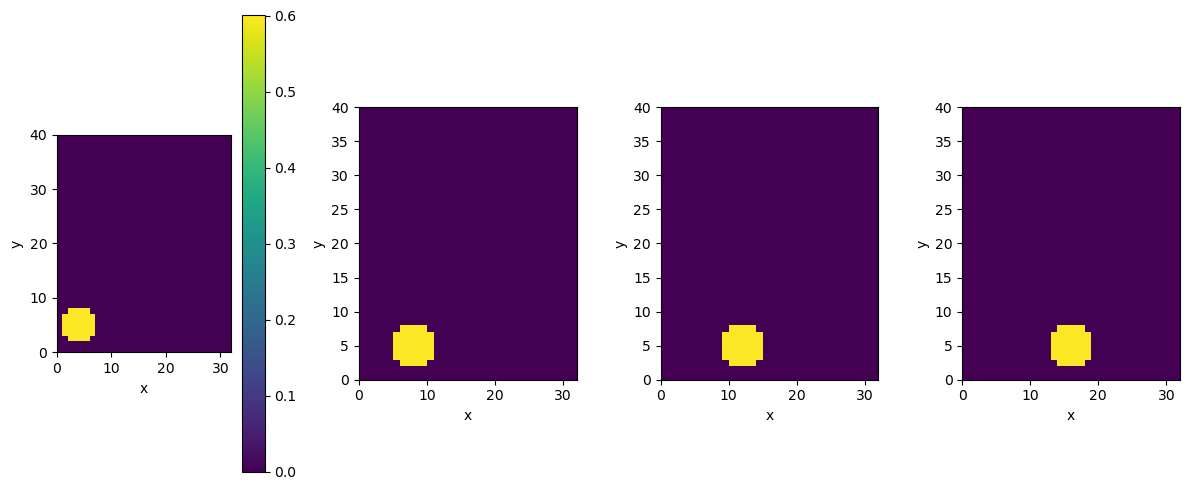

In [7]:
smoke += INFLOW
buoyancy_force = smoke * (0, 0.5) @ velocity
velocity += buoyancy_force
velocity, _ = fluid.make_incompressible(velocity)

vis.plot(smoke)

In [8]:
trajectory = [smoke]
Velocity   = [velocity]
for i in range(100):
    print(i, end=' ')
    smoke = advect.mac_cormack(smoke, velocity, dt=1) + INFLOW
    buoyancy_force = smoke * (0, 0.5) @ velocity
    velocity = advect.semi_lagrangian(velocity, velocity, dt=1) + buoyancy_force
    velocity, _ = fluid.make_incompressible(velocity)
    trajectory.append(smoke)
    Velocity.append(velocity)
trajectory = field.stack(trajectory, batch('time'))
vis.plot(trajectory, animate='time')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

<Figure size 640x480 with 0 Axes>

In [9]:
#pip install ffmpeg-python

In [10]:
from phi.torch.flow import *

In [11]:
dir(smoke)

['__abs__',
 '__add__',
 '__class__',
 '__concat__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__value_attrs__',
 '__variable_attrs__',
 '__weakref__',
 '_bounds',
 '_elements',
 '_extrapolation',
 '_op1',
 '_op2',
 '_resolution',
 '_sample',
 '_shift_resample',
 '_values',
 'at',
 'bounds',
 'box',
 'closest_values',
 'data',
 'dimension',
 'dx',
 'elements',
 'extrapolation',
 'points',
 'resolution',
 'shape',
 

In [12]:
dir(smoke.points)

['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_ufunc__',
 '__bool__',
 '__cast__',
 '__class__',
 '__complex__',
 '__concat__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pack_dims__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__t

In [13]:
dir(smoke)

['__abs__',
 '__add__',
 '__class__',
 '__concat__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__value_attrs__',
 '__variable_attrs__',
 '__weakref__',
 '_bounds',
 '_elements',
 '_extrapolation',
 '_op1',
 '_op2',
 '_resolution',
 '_sample',
 '_shift_resample',
 '_values',
 'at',
 'bounds',
 'box',
 'closest_values',
 'data',
 'dimension',
 'dx',
 'elements',
 'extrapolation',
 'points',
 'resolution',
 'shape',
 

In [14]:
dir(smoke.data)

['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_ufunc__',
 '__bool__',
 '__cast__',
 '__class__',
 '__complex__',
 '__concat__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pack_dims__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__t

In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [16]:
dir(velocity.tensor)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'exists',
 'item_names',
 'name',
 'obj',
 'rename',
 'replace',
 'retype',
 'size',
 'size_or_1',
 'type',
 'unpack',
 'unstack']

In [17]:
np.array(velocity.staggered_tensor())

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: SyntaxWarning: Automatic conversion of Φ-Flow tensors to NumPy can cause problems because the dimension order is not guaranteed.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[[[ 0.        ,  0.        ],
         [ 0.        ,  0.04706505],
         [ 0.        ,  0.17813191],
         ...,
         [ 0.        , -0.32866895],
         [ 0.        , -0.23774147],
         [ 0.        ,  0.        ]],

        [[-0.04705968,  0.        ],
         [-0.13105176,  0.04302634],
         [ 0.09354886, -0.10015202],
         ...,
         [-0.09092356,  0.22887087],
         [-0.23774569,  0.32552552],
         [ 0.        ,  0.        ]],

        [[-0.09007999,  0.        ],
         [ 0.01210331,  0.14286394],
         [-0.16608989,  0.5007374 ],
         ...,
         [-0.18758127, -0.303025  ],
         [ 0.08775553, -0.19303834],
         [ 0.        ,  0.        ]],

        ...,

        [[-0.08331119,  0.        ],
         [-0.08536806, -0.04005419],
         [-0.08602068, -0.07869246],
         ...,
         [-0.33926225,  1.2845311 ],
         [-0.10914895,  0.65281105],
         [ 0.        ,  0.        ]],

        [[-0.04325418,  0.        

In [18]:
#list(velocity.data)#.shape
type(velocity.tensor)

phi.math.magic.BoundDim

In [19]:
type(smoke.data), type(velocity.data)#stack(velocity.dimension))

(phi.math._tensors.NativeTensor, phi.math._tensors.TensorStack)

In [20]:
dir(velocity.data)

['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_ufunc__',
 '__bool__',
 '__cast__',
 '__class__',
 '__complex__',
 '__concat__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__expand__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pack_dims__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__replace_dims__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__stack__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__t

In [21]:
density  = np.array(smoke.data)
vel = np.array(velocity.staggered_tensor())

In [22]:
vel[0][:,:,0].shape

(33, 41)

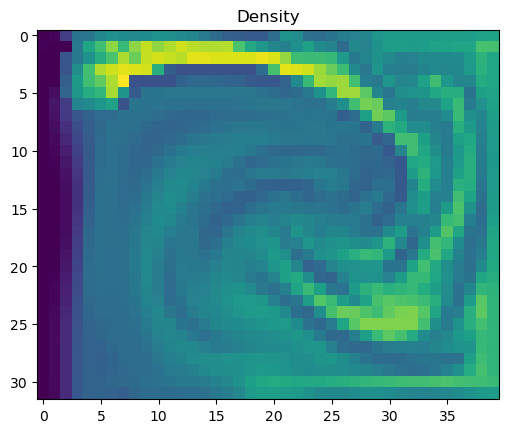

In [23]:
plt.title("Density")
plt.imshow(density[0])

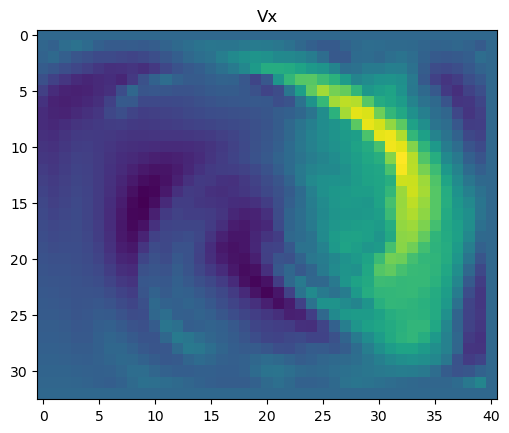

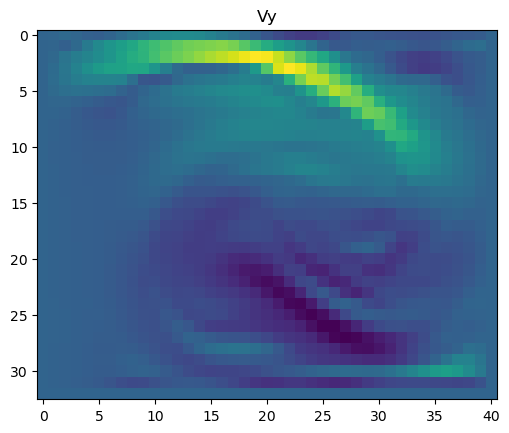

In [24]:
plt.title("Vx")
plt.imshow(vel[0][:,:,0])
plt.show()
plt.title("Vy")
plt.imshow(vel[0][:,:,1])

# Gradient

In [25]:
# from phi.jax.flow import *
from phi.torch.flow import *
# from phi.tf.flow import *

In [26]:
INFLOW_LOCATION = tensor([(4, 5), (8, 5), (12, 5), (16, 5)], batch('inflow_loc'), channel(vector='x,y'))
INFLOW = 0.6 * CenteredGrid(Sphere(center=INFLOW_LOCATION, radius=3), extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))

In [27]:
type(INFLOW.values.native(INFLOW.shape))

torch.Tensor

In [28]:
def simulate(smoke: CenteredGrid, velocity: StaggeredGrid):
  for _ in range(20):
    smoke = advect.mac_cormack(smoke, velocity, dt=1) + INFLOW
    buoyancy_force = smoke * (0, 0.5) @ velocity
    velocity = advect.semi_lagrangian(velocity, velocity, dt=1) + buoyancy_force
    velocity, _ = fluid.make_incompressible(velocity)
  loss = math.sum(field.l2_loss(diffuse.explicit(smoke - field.stop_gradient(smoke.inflow_loc[-1]), 1, 1, 10)))
  return loss, smoke, velocity

In [29]:
initial_smoke = CenteredGrid(0, extrapolation.BOUNDARY, x=32, y=40, bounds=Box(x=32, y=40))
initial_velocity = StaggeredGrid(math.zeros(batch(inflow_loc=4)), extrapolation.ZERO, x=32, y=40, bounds=Box(x=32, y=40))

In [52]:
sim_grad = field.functional_gradient(simulate, wrt='smoke', get_output=False)

<Figure size 1200x500 with 2 Axes>

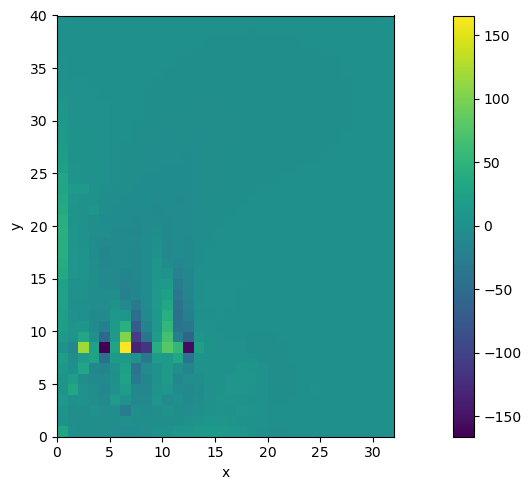

In [53]:
velocity_grad = sim_grad(initial_smoke, initial_velocity)

vis.plot(velocity_grad)

In [37]:
#velocity_grad.data
a = np.array(velocity_grad.staggered_tensor())

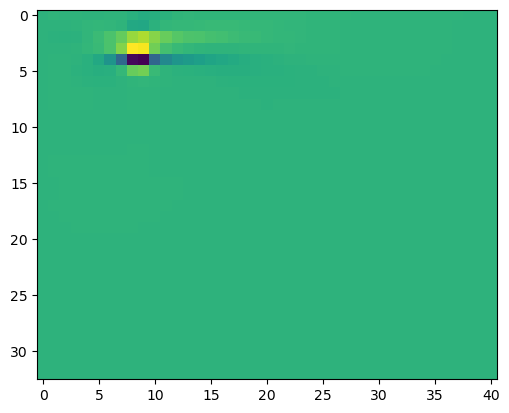

In [42]:
plt.imshow(a[:,:,0,1])